# Motivation

By following the steps in this this homework question, you will:
1. apply the concepts of seawater properties from class and
2. practice making plots that compare two Seaglider dives to prepare for the project later this semester.


# General Instructions

This homework question is **one question that is part of HW05**.  Please:
1. excute the Python cells below,
2. make small extensions to the code as described below in the code cells and in Question 8a, 
3. answer Questions 8bc in the blank Markdown cell, 
4. save the notebook, 
5. convert the notebook to PDF, and
6. submit the PDF, *along with the main HW05 PDF* to Blackboard. 

***


# Step 1: Import libraries and define a function

In [1]:
#=================================================================
# Plotting tools
import matplotlib.pyplot as plt

#=================================================================
# Data loading and manipulation tools
import pandas as pd
import numpy as np
import load_glider_data as sg

#=================================================================
# Function to compute the slope between each successive pair of
# points by finding the differences between points and the 
# differences in their positions.  This is formally called
# a "centered finite difference approximation to a derivative".
#
# INPUTS:
# x -> positions of the data (e.g. depths)
# y -> values of the data (e.g. temperatures)
#
# OUTPUTS:
# centers = positions of the slopes (e.g. centers between all differences)
# slope = slopes between each point-to-point span.
#=================================================================
def find_slopes(x,y):
    
    # Compute the midpoint of each
    # point-to-point span.
    # 0:-2 means "from start to second-to-last number"
    # 1:-1 means "from 2nd element to last number"
    centers = (x[0:-2] + x[1:-1])/2
    
    dx = np.diff(x)
    dy = np.diff(y)
    
    # Rise over run
    slopes = dy/dx
    
    return centers, slopes
    
#=================================================================

# Step 2: Temperature and salinity profile plots!

Just as in LAB01, **Profile plots** reflect how a property changes with depth in the ocean.  To make the plot more visually intuitive, depth is on the vertical axis (up is positive) and the property is on the horizontal axis. 

/mnt/local/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in true_divide


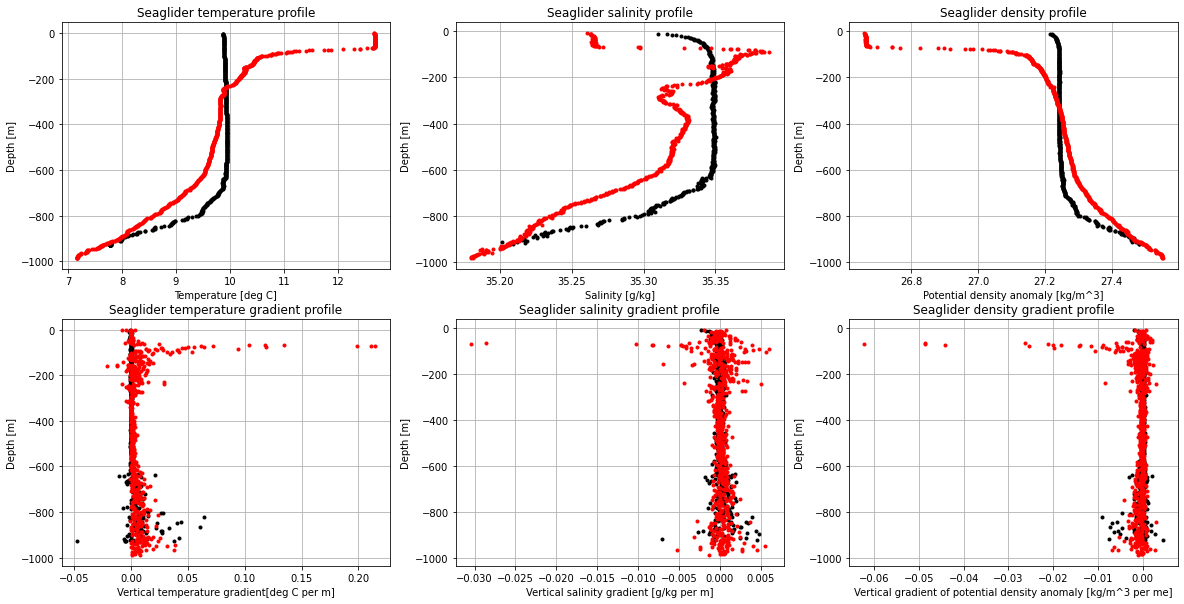

In [2]:
# Load the data from dive 1236 (same as LAB01).
# lon = current longitude
# lat = current latitude
# de = depth [m]
# te = temperature [deg C]
# sa = salinity [g salt/kg seawater = "per mil"]
# th = potential temperature (temperature corrected for compressibility)
# s0 = potential density anomaly (density corrected for compressibility, subtract 1000 kg/m^3)
lon, lat, de, te, sa, th, s0 = sg.load_hb_profile(605,1236)

# Make all depths negative down to be consistent throughout.
de = -1*de

# Compute the vertical changes
te_centers, te_slopes = find_slopes(de,te)
sa_centers, sa_slopes = find_slopes(de,sa)
s0_centers, s0_slopes = find_slopes(de,s0)

# Initialize the axis
fig, axs = plt.subplots(2,3,figsize=(20,10))

# Top left panel
axs[0,0].plot(te,de,'k.')
axs[0,0].set_xlabel('Temperature [deg C]')
axs[0,0].set_ylabel('Depth [m]')
axs[0,0].set_title('Seaglider temperature profile')
axs[0,0].grid()

# Top middle panel
axs[0,1].plot(sa,de,'k.')
axs[0,1].set_xlabel('Salinity [g/kg]')
axs[0,1].set_ylabel('Depth [m]')
axs[0,1].set_title('Seaglider salinity profile')
axs[0,1].grid()

# Top right panel
axs[0,2].plot(s0,de,'k.')
axs[0,2].set_xlabel('Potential density anomaly [kg/m^3]')
axs[0,2].set_ylabel('Depth [m]')
axs[0,2].set_title('Seaglider density profile')
axs[0,2].grid()

# Bottom left panel
axs[1,0].plot(te_slopes,te_centers,'k.')
axs[1,0].set_xlabel('Vertical temperature gradient[deg C per m]')
axs[1,0].set_ylabel('Depth [m]')
axs[1,0].set_title('Seaglider temperature gradient profile')
axs[1,0].grid()

# Bottom middle panel
axs[1,1].plot(sa_slopes,sa_centers,'k.')
axs[1,1].set_xlabel('Vertical salinity gradient [g/kg per m]')
axs[1,1].set_ylabel('Depth [m]')
axs[1,1].set_title('Seaglider salinity gradient profile')
axs[1,1].grid()

# Bottom right panel
axs[1,2].plot(s0_slopes,s0_centers,'k.')
axs[1,2].set_xlabel('Vertical gradient of potential density anomaly [kg/m^3 per me]')
axs[1,2].set_ylabel('Depth [m]')
axs[1,2].set_title('Seaglider density gradient profile')
axs[1,2].grid()

#==========================================================
# YOUR MODIFICATIONS BEGIN HERE
#
# Copy, paste, and modify code above as needed.
#==========================================================

# Load glider data from dive 400.  Enter the dive number
# as '0400' (include the quotes) because the file that is
# being opened has zero-padded numbering.  If you use the
# same variable names as above, the data loaded here will
# overwrite the data that was loaded previously. You
# can use different variable names if you wish.
lon, lat, de, te, sa, th, s0 = sg.load_hb_profile(605,'0400')

# Make all depths negative down to be consistent throughout.
de = -1*de

# Compute the vertical changes
te_centers, te_slopes = find_slopes(de,te)
sa_centers, sa_slopes = find_slopes(de,sa)
s0_centers, s0_slopes = find_slopes(de,s0)

# Plot axes already initialized above.  All you
# need to do is add additional lines to each figure.

# Top left panel
axs[0,0].plot(te,de,'r.')

# Top middle panel
axs[0,1].plot(sa,de,'r.')

# Top right panel
axs[0,2].plot(s0,de,'r.')

# Bottom left panel
axs[1,0].plot(te_slopes,te_centers,'r.')

# Bottom middle panel
axs[1,1].plot(sa_slopes,sa_centers,'r.')

# Bottom right panel
axs[1,2].plot(s0_slopes,s0_centers,'r.')



# Question 8

+ **Part a)** Modify the code above (as suggested by the comments) so it displays a 2x3-panel plot showing the profiles of temperature, salinity, and density and the vertical changes (i.e. "slopes" or "gradients") for **two** dives 400 and 1236, one overlaid on the other. See LAB01 code for additional examples.  Please plot all data for dive 1236 in black and all data for dive 400 in red.  Both dives come from similar locations in the offshore waters of the Rockall Trough but dive 1236 is from January 2021 and dive 400 is from October 2020.  The figure displayed above is the main result of this question subpart that will be graded. **(6 points)**
+ **Part b)** In the Markdown cell below, please describe the differences between the dives.  In particular, identify (with depth ranges) and contrast the permanent 'clines and the seasonal 'clines. **(4 points)**
+ **Part c)** In the Markdown cell below, please write a sentence that states the **length scales** of the typcial impact of winds and solar heating over the summer and vertical mixing due to storms over the winter. Justify your answer with specific support from the figures generated above. **(2 points)**

# Grading scheme here:
+ **Part a)** See code above.  One half point for each plot command.  One point for loading dive 400, one point for dealing with depths negative down (and the gradient sign convention if they choose a different way than I do...), and one point for computing the vertical gradient for at least one variable.
+ **Part b)** 1 point for depth range of seasonal 'cline (roughly 50-100m in each case but up to 50-300m is OK) and for the depth range of the permanent 'cline (roughly 800-1000m, but they can present up to 600-1000m or a narrower range). One point for obs that seasonal 'cline is stronger in summer than winter.  One point for obs that permanent 'cline is pretty static over time, especially at great depth.
+ **Part c)** One point for summer impact is at most about 200 m deep and winter mixing can be much deeper, down to about 800 m.  One point for relevant, specific justification based on the figure.

**Optional:** You are welcome to look at the `load_glider_data.py` file that is distributed with this notebook.  The code in this file is loaded at the beginning of the notebook for your use throughout the notebook.